In [2]:
from matplotlib.finance import candlestick_ohlc, quotes_historical_yahoo_ohlc
from matplotlib.dates import AutoDateLocator, AutoDateFormatter, date2num
from matplotlib.font_manager import FontProperties
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime as dt
from datetime import timedelta as td
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12.0, 10.0)
plt.style.use('ggplot')

# 設定日文及中文字型
ja_font_prop = FontProperties(size=18, fname='msmincho.ttc')
zh_font_prop = FontProperties(size=18, fname='msjh.ttc')
matplotlib.rcParams.update({'font.size': 12})

In [3]:
import jsm

def ja_stock_price(stock_id, start, end):
    if isinstance(stock_id, basestring):
        stock_id = int(stock_id)
    q = jsm.Quotes()
    nomura = q.get_historical_prices(stock_id, jsm.DAILY, start_date=start, end_date=end)
    stock_price = [(date2num(p.date), p.open, p.high, p.low, p.close, p.volume) for p in nomura]
    return stock_price

In [4]:
from cStringIO import StringIO
import requests, csv, codecs

def tw_stock_price(stock_id, start, end):
    if not isinstance(stock_id, basestring):
        stock_id = str(stock_id)
    url_StockPrice = 'http://www.twse.com.tw/ch/trading/exchange/STOCK_DAY/STOCK_DAYMAIN.php'
    year = start.year
    month = start.month
    prices = []

    while year < end.year or month <= end.month:
        post_param = {'query_year': str(year), 'query_month': str(month), 'CO_ID': stock_id, 'download': 'csv'}
        r = requests.post(url_StockPrice, data=post_param)
        r.encoding = 'big5'
        text = StringIO(r.text[r.text.find('\n') + 1:].encode('utf8'))
        month_data = list(csv.reader(text))[1:]
        for row in month_data:
            date = map(int, row[0].split('/'))
            date[0] = date[0] + 1911
            date = dt(date[0], date[1], date[2])
            if date < start or date > end:
                print date
                continue
            op, hi, lo, cl = map(float, row[3:7])
            prices.append((date2num(date), op, hi, lo, cl, int(row[2].replace(',', ''))))
        if month == 12:
            month = 1
            year += 1
        else:
            month += 1
    return prices

In [5]:
def us_stock_price(stock_id, start, end):
    assert isinstance(stock_id, basestring)
    return quotes_historical_yahoo_ohlc(stock_id, start, end)

In [12]:
def candlestick(stock_price, title, font=None):
    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)
    locater = AutoDateLocator()
    ax.xaxis.set_major_locator(locater)
    ax.xaxis.set_major_formatter(AutoDateFormatter(locater))

    candlestick_ohlc(ax, stock_price, width=0.7)
    ax.xaxis_date()
    ax.autoscale_view()
    if font is not None:
        ax.set_title(title, fontproperties=font)
    else:
        ax.set_title(title)
    plt.show()
    return fig

In [8]:
start_date = dt(2016,9,1)
end_date = dt.now()

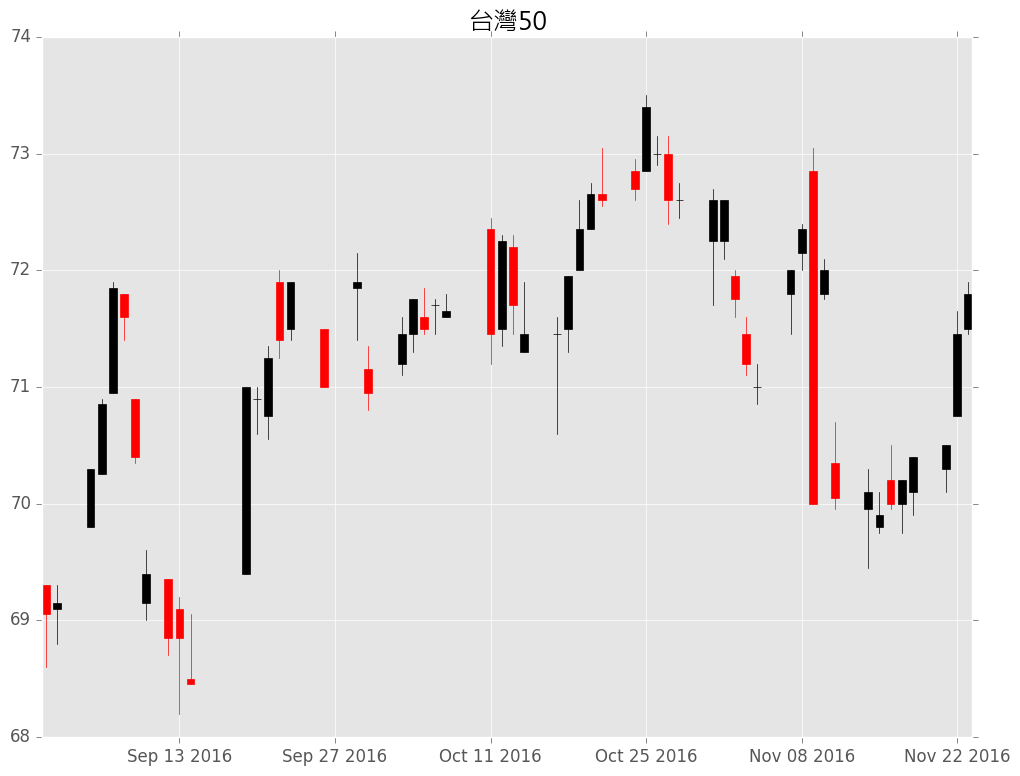

In [9]:
stock_price = tw_stock_price('0050', start_date, end_date)
fig = candlestick(stock_price, u'台灣50', zh_font_prop)

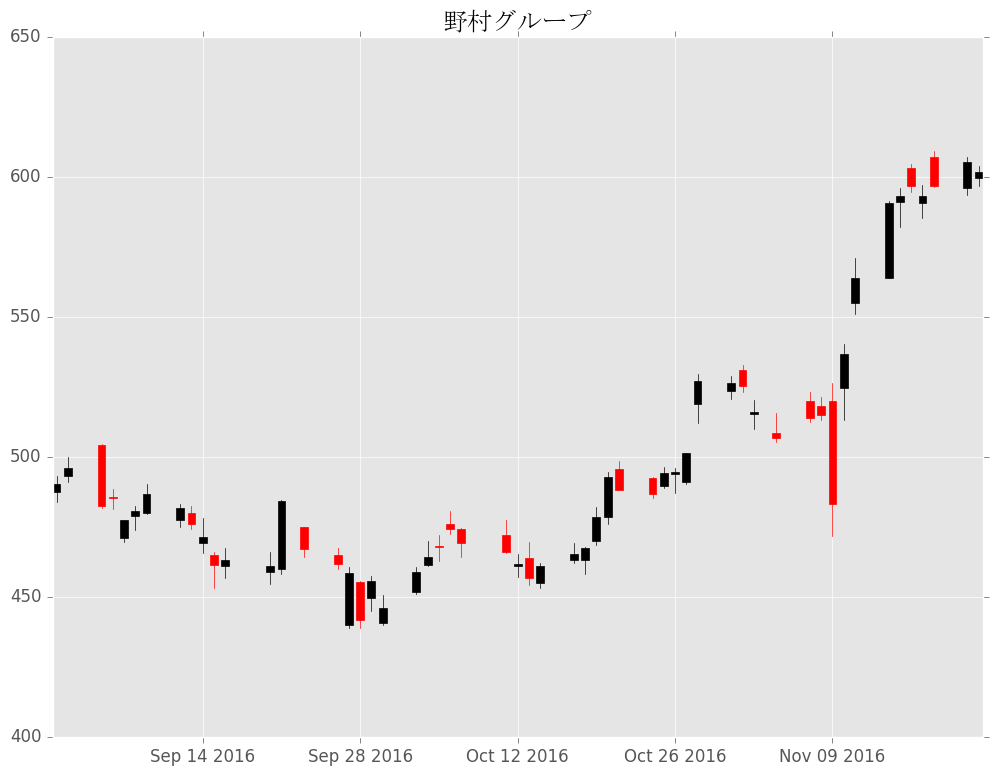

In [11]:
stock_price = ja_stock_price('8604', start_date, end_date)
fig = candlestick(stock_price, u'野村グループ', ja_font_prop)

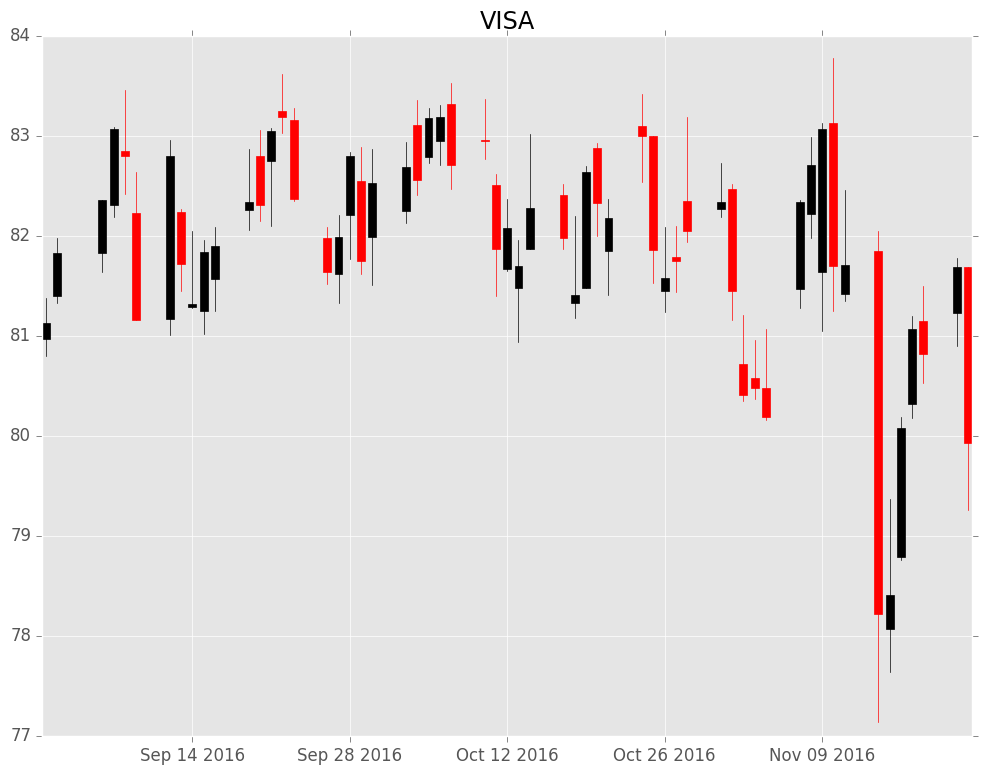

In [13]:
stock_price = us_stock_price('V', start_date, end_date)
fig = candlestick(stock_price, u'VISA')

In [ ]:
# fig.savefig('./foo.png', bbox_inches='tight')  # 需要存成PNG時打開這一行